In [109]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x

rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()


emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

random_vel= [11.8,30,50,100,150]





C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm
C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
cc_k = c.to(u.km / u.s).value
v_th = 11.7673179819719e5  # cm/s
K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952

directory_1 = '/home/jin/data_CIV/' 



def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)

3.39e+13


In [110]:

check = 0
random_vel = [11.8]
directory_1 = '/home/jin/data_CIV/'
for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand*10)
                v_title = int(v_rand)
                index_v_ran = 1
            elif v_rand < 100 and v_rand>12 :
                v_title = int(v_rand*10)
                index_v_ran = 1
            elif v_rand >= 1000:
                v_title = int(v_rand/10)
                index_v_ran = 3
            else : 
                v_title = int(v_rand)
                index_v_ran = 2

            for mm , emit_v in enumerate(emit):
                if emit_v == 1:
                    emit_title = 100
                    index_emit = 0
                elif emit_v < 100 and emit_v > 1:
                    emit_title = int(emit_v*10)
                    index_emit = 1
                elif emit_v >= 1000:
                    emit_title = int(emit_v/10)
                    index_emit = 3
                else :
                    emit_title = int(emit_v)
                    index_emit = 2
                for nn, expand_v in enumerate(expand_vel):
                    if expand_v == 0 :
                        expand_title = '000'
                        index_expand =0
                    elif expand_v < 100 and expand_v > 0:
                        expand_title = int(expand_v*10)
                        index_expand = 1
                    elif expand_v >= 1000:
                        expand_title = int(expand_v/10)
                        index_expand = 3                       
                    else :
                        expand_title = int(expand_v)
                        index_expand = 2
                
                    path_sp= f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{index_expand}_Vemit{emit_title}E+0{index_emit}_tauD000E+00_Vran{v_title}E+0{index_v_ran}spec_com.dat'
                # 데이터 읽기
                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        check += 1
                        continue

                    globals()[f'data_sp_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = pd.read_csv(path_sp, sep='\s+', header=None)
                    globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'][0]
                    globals()[f'sp_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'][2]

                    # K and H line seperate
                    lam_c = (C_IV_K_A+C_IV_H_A)/2
                    #K line
                    globals()[f'x_K_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] <= lam_c]
                    globals()[f'y_K_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] <= lam_c]
                    #H line
                    globals()[f'x_H_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] >= lam_c]
                    globals()[f'y_H_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] >= lam_c]

                


                    globals()[f'vx_K_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = ((globals()[f'x_K_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
                    globals()[f'vy_K_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}']=  globals()[f'y_K_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}']



                    globals()[f'vx_H_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] = ((globals()[f'x_H_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
                    globals()[f'vy_H_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}']=  globals()[f'y_H_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}']
             
print(check)

0


In [111]:

def analy_function(sigma):
    NN = 10000  
    xx = np.linspace(1530,1570,NN)
    sp_dlam_1 = xx
    tv_k = ((xx-C_IV_K_A ) / C_IV_K_A ) * cc_k
    tv_h = ((xx-C_IV_H_A) / C_IV_H_A ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    sp_1 = fx
    del_V_space = (sp_dlam_1 / C_IV_K  - 1) * cc_k

    lam_c= ((C_IV_H_A + C_IV_K_A)/2)

    
    indices_K_V = np.where(xx <= lam_c)[0]
    indices_H_V = np.where(xx >=lam_c)[0]

    sp_V_K = del_V_space[indices_K_V]
    sp_V_H = del_V_space[indices_H_V]

    sp_K_f = sp_1[indices_K_V]
    sp_H_f = sp_1[indices_H_V] 

    sp_lam_K = sp_dlam_1[indices_K_V]
    sp_lam_H = sp_dlam_1[indices_H_V]

    dk = sp_lam_K[1]-sp_lam_K[0]  
    int_k = np.sum(dk*sp_K_f,axis=0)
    dh = sp_lam_H[1]-sp_lam_H[0]  
    int_h = np.sum(dh*sp_H_f,axis=0)
    RC = int_k/ int_h
    # print(len(fx/f0))
    return RC , fx/f0

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

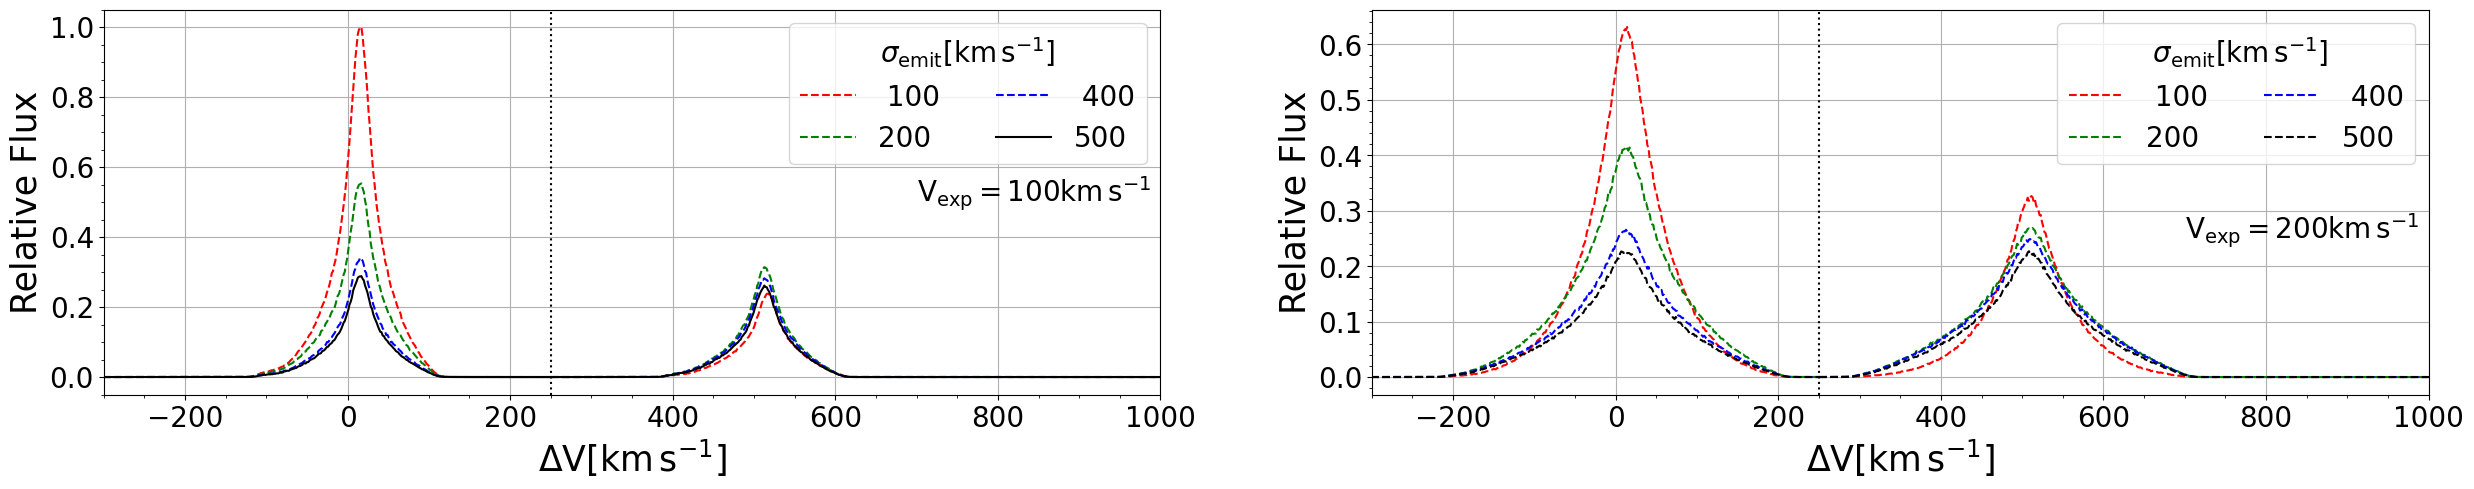

In [112]:
fig = plt.figure(1,figsize=(30,5))

plt.subplot(121)
atom_n,index, expand = 32,15,100
v_ran= 118
emit_n = 100
normal =  max(globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'])
#max(globals()[f'vy_K_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'])
plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/normal,'r--',label=f' {emit_n}')
plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'],globals()[f'vy_H_{atom}_{index}_{expand}_{emit_v}_{v_rand}']/normal,'r--')

emit_n = 200
plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal ,'g--',label=f'{emit_n}')
plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'],globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'g--')

emit_n = 400
plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'b--',label=f' {emit_n}')
plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'b--')

emit_n = 500
plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'k-',alpha=1.0,label=f'{emit_n}')
plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'k-',alpha=1.0)

# emit_n = 100
# # normal =  max(globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'])
# #max(globals()[f'vy_K_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'])
# plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/normal,'r--',alpha=0.5,label=f' {emit_n}')
# plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'],globals()[f'vy_H_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}']/normal,'r--',alpha=0.5)

vv = ((C_IV_H_A/C_IV_K_A-1)*cc_k /2)
plt.axvline(vv ,ymin=0,ymax=10,color='k',linestyle=':')
plt.xlim(-300, 1000)
plt.minorticks_on()
# plt.xlim(-1500,1500)
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=2,title=r'$\sigma_{{\rm emit}} [\rm km \, s^{{-1}} ]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V [\rm km \, s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.text(700,0.5,f'$\\rm V_{{\\rm exp}} = {expand} \\rm km \\, s^{{-1}}$',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(122)
atom_n,index, expand = 32,15,200

emit_n = 100
# normal = max(globals()[f'y_H_{atom}_{index}_{expand_v}_{emit_v}_{v_rand}'])
plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/normal,'r--',label=f' {emit_n}')
plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'],globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/normal,'r--')

emit_n = 200
plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal ,'g--',label=f'{emit_n}')
plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'],globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'g--')

emit_n = 400
plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'b--',label=f' {emit_n}')
plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'b--')

emit_n = 500
plt.plot(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'k--',label=f'{emit_n}')
plt.plot(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}'] ,globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_ran}']/ normal,'k--')



vv = ((C_IV_H_A/C_IV_K_A-1)*cc_k /2)
plt.axvline(vv ,ymin=0,ymax=10,color='k',linestyle=':')
plt.xlim(-300, 1000)
plt.minorticks_on()
# plt.xlim(-1500,1500)
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=2,title=r' $\sigma_{\rm emit} [\rm km \, s^{-1} ]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V [\rm km \, s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.text(700,0.25,f'$\\rm V_{{\\rm exp}} = {expand} \\rm km \\, s^{{-1}}$',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig(r'/home/jin/바탕화면/N_CIV_15_emit_vexp.pdf',bbox_inches='tight')

In [113]:
def ratio(x_1,y_1,x_2,y_2):
    delx_1 = x_1[1]- x_1[0]
    total_1 = np.sum(y_1*delx_1,axis=0)
    delx_2 = x_2[1]- x_2[0]
    total_2 = np.sum(y_2*delx_2,axis=0)
    ratio = total_1 / total_2
    return ratio

def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0



NN = 10000
x = np.linspace(1530,1570,NN)
sigma_tt = np.arange(10,610,10)
C_IV_K = 1548.187 # cm
C_IV_H = 1550.772  # cm
R_c_tt = np.zeros(len(sigma_tt)) 
lam_c = (C_IV_H +C_IV_K) / 2
for ii, sig in (enumerate(sigma_tt)):
    ff,f0 = function(sig,x,C_IV_K,C_IV_H)
    xx_k = x[x<=lam_c]
    xx_h = x[x>lam_c]   
    ff_k = ff[x<=lam_c]
    ff_h = ff[x>lam_c] 
    dlam = x[1]-x[0]
    flux_k = np.sum(ff_k*dlam,axis=0)
    flux_h = np.sum(ff_h*dlam,axis=0)
    R_c_tt[ii] = flux_k/ flux_h


NN = 10000
x = np.linspace(1530,1570,NN)

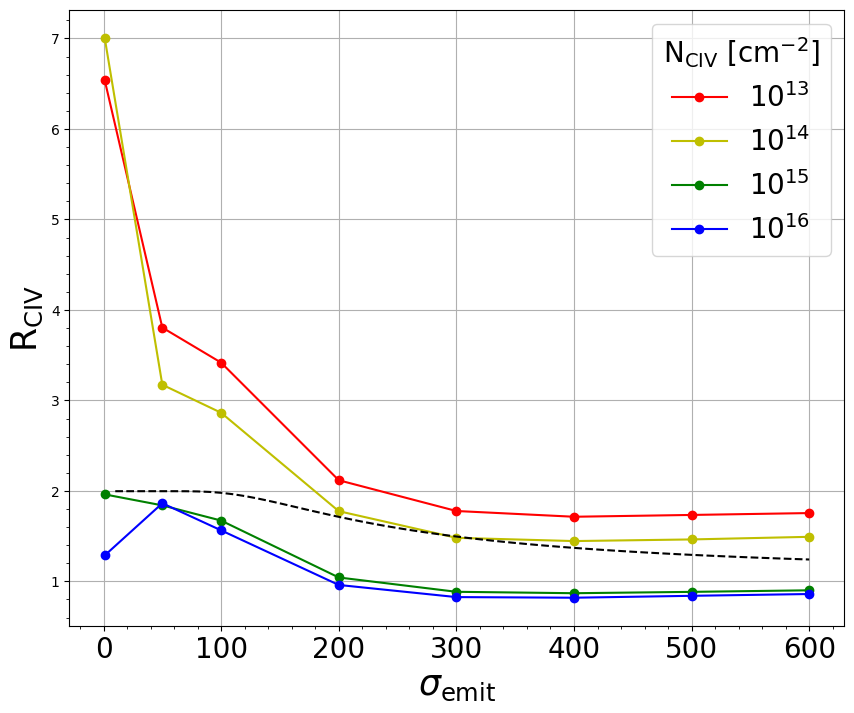

In [114]:
fig = plt.figure(1,figsize=(10,8))
atom_n, expand = 32, 300
v_rand = 118
# 첫 번째 조합: index = 13
index = 13
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'x_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'y_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'x_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'y_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'ro-', label=f'$10^{{{index}}}$')

index = 14
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'x_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'y_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'x_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'y_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'yo-', label=f'$10^{{{index}}}$')

index = 15
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'x_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'y_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'x_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'y_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'go-', label=f'$10^{{{index}}}$')

index = 16
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'x_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'y_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'x_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'y_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'bo-', label=f'$10^{{{index}}}$')

plt.legend(fontsize=20,title=f'$\\rm N_{{\\rm CIV}} ~[\\rm cm^{{-2}}]$',title_fontsize=20)
plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\sigma_{\rm emit}$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
plt.minorticks_on()

# plt.savefig(r'/home/jin/바탕화면/Vexp_400_N_CIV_emit.pdf',bbox_inches='tight')

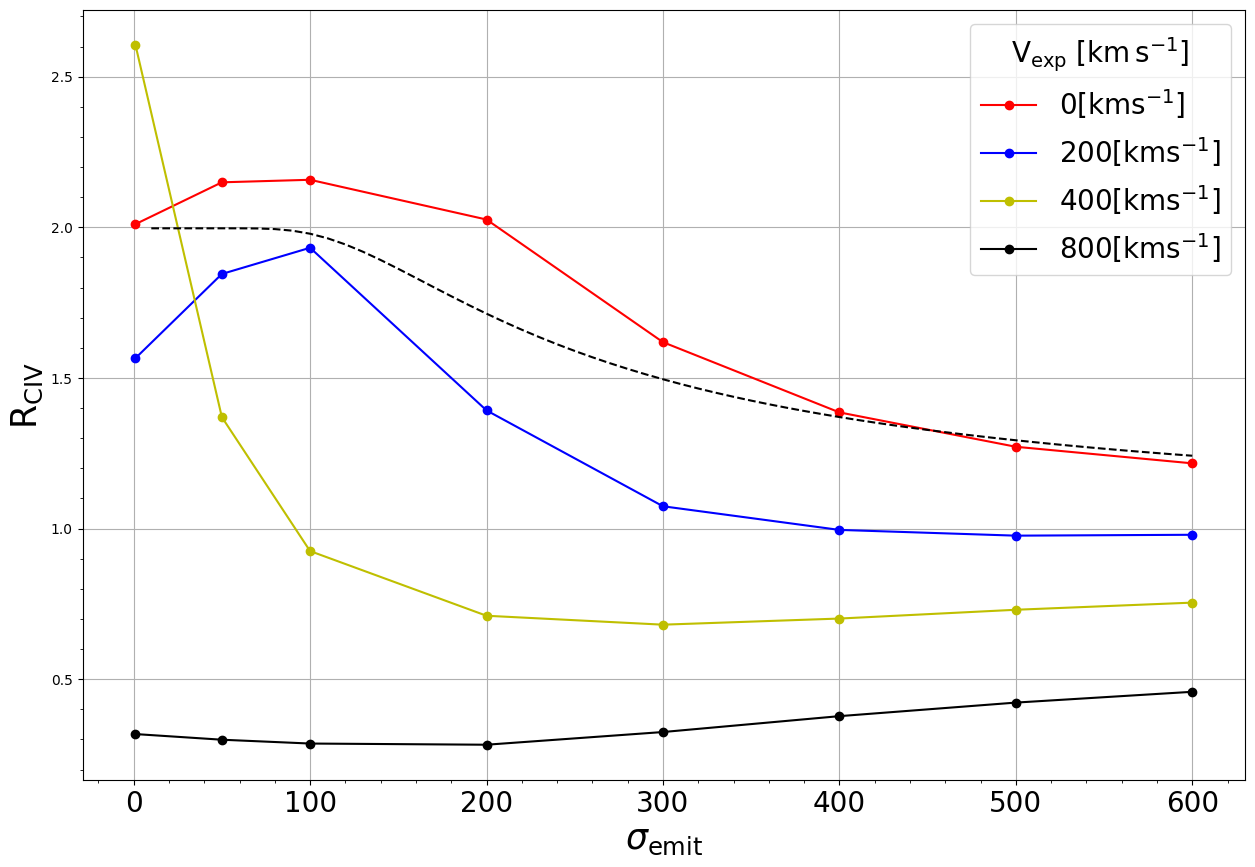

In [115]:
fig = plt.figure(1,figsize=(15,10))

atom_n, index = 32, 15
v_rand = 118
expand = 0
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'ro-', label=f'${{{expand}}} [ \\rm km s^{{-1}}]$')

expand = 200
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'bo-', label=f'${{{expand}}} [ \\rm km s^{{-1}}]$')

expand = 400
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'yo-', label=f'${{{expand}}} [ \\rm km s^{{-1}}]$')

expand = 800
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'ko-', label=f'${{{expand}}} [ \\rm km s^{{-1}}]$')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\rm V_{{\\rm exp}}  ~ [km \, s^{{{-1}}}]$',title_fontsize=20)
plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\sigma_{\rm emit}$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
# plt.savefig(r'/home/jin/바탕화면/N_CIV_15_Vexp_emit.pdf',bbox_inches='tight')

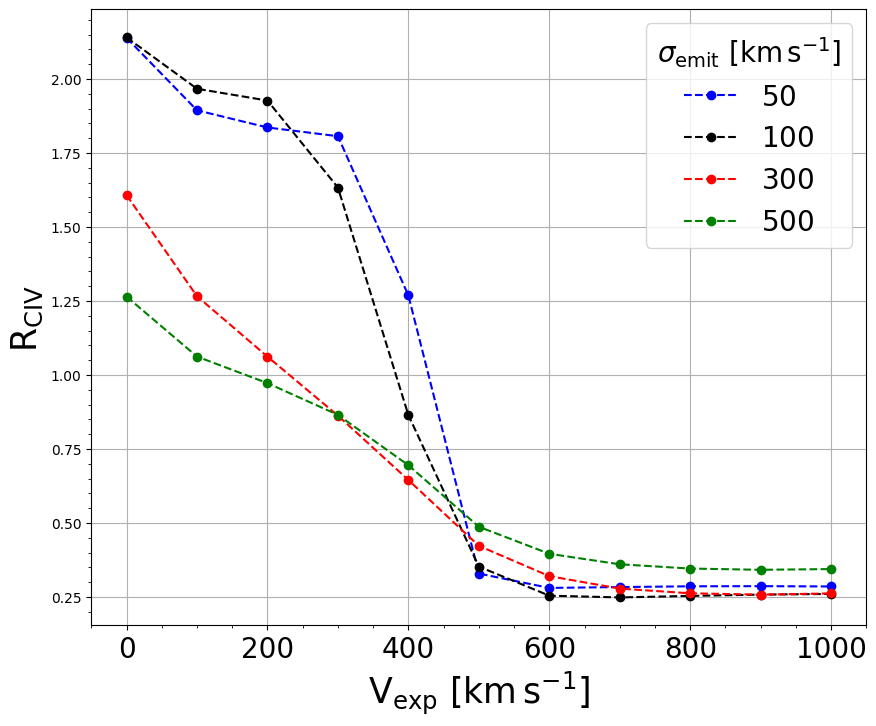

In [116]:
fig = plt.figure(1,figsize=(10,8))
atom_n, index= 50, 15
v_rand = 118


emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${emit_n} $')

emit_n = 100
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${emit_n} $')


emit_n = 300
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${emit_n} $')


emit_n = 500
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${emit_n} $')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\sigma_{{\\rm emit}} ~ [\\rm km \\, s^{{-1}}]$',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
# plt.savefig(r'/home/jin/바탕화면/N_CIV_15_to_expandv_emit.pdf',bbox_inches='tight')

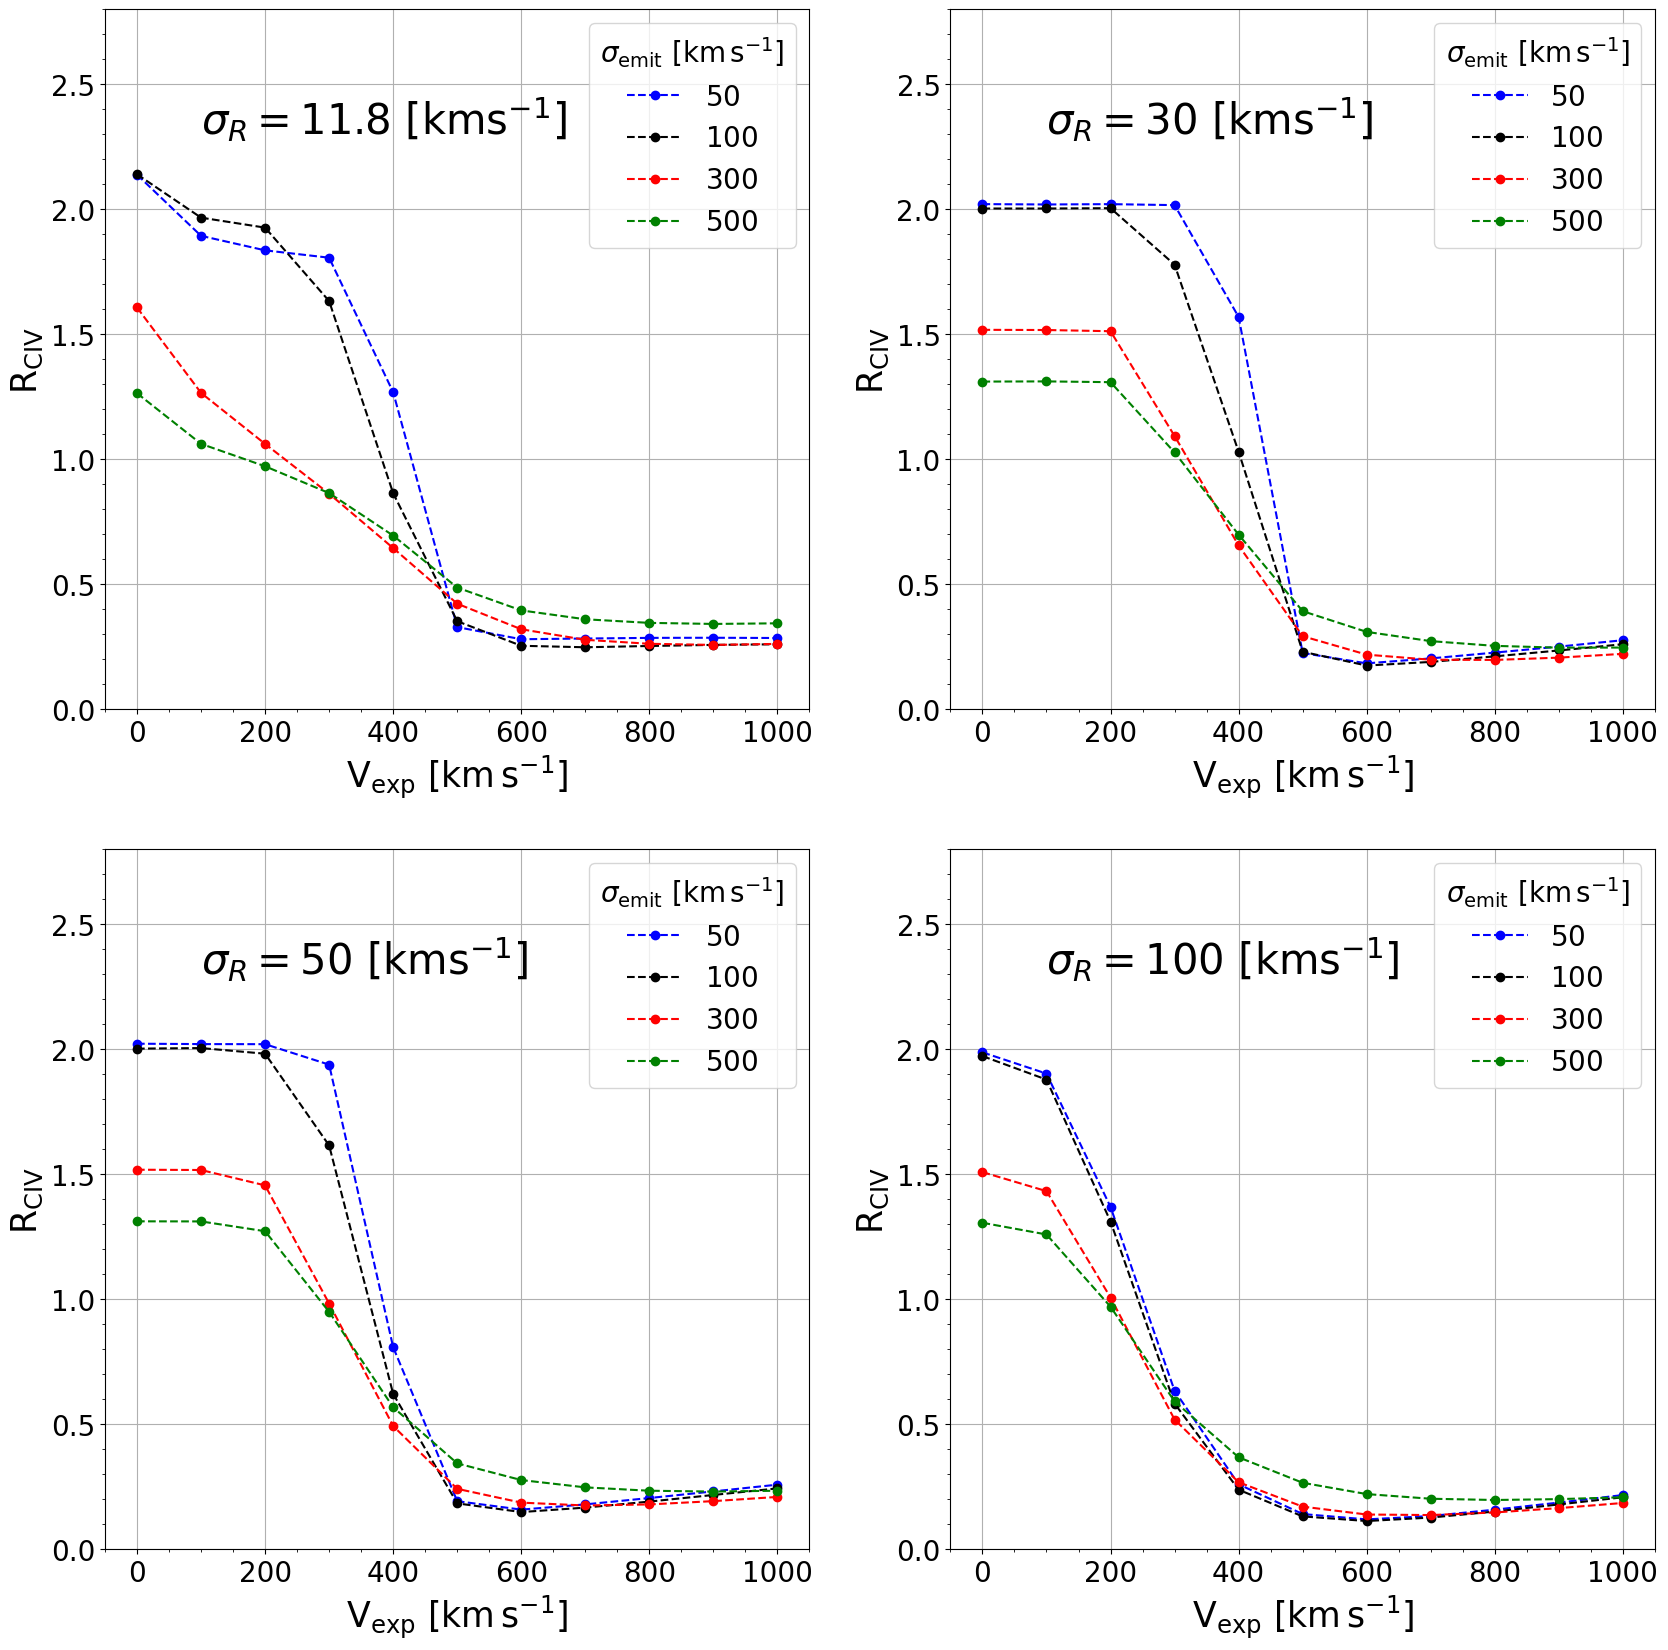

In [117]:
fig = plt.figure(1,figsize=(20,20))
atom_n, index= 50, 15

plt.subplot(221)
v_rand = 118

emit_n = 50
first_label = True
plt.text(100,2.3,f'$\sigma_R = {v_rand/10} ~ [\\rm km s^{{-1}}]$',size=30)
Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${emit_n} $')

emit_n = 100
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${emit_n} $')


emit_n = 300
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${emit_n} $')


emit_n = 500
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${emit_n} $')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\sigma_{{\\rm emit}} ~ [\\rm km \\, s^{{-1}}]$',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
plt.ylim(0,2.5+0.3)
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5],fontsize=20)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)

plt.subplot(222)
v_rand = 30

plt.text(100,2.3,f'$\sigma_R = {v_rand} ~ [\\rm km s^{{-1}}]$',size=30)
emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${emit_n} $')

emit_n = 100
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${emit_n} $')


emit_n = 300
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${emit_n} $')


emit_n = 500
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${emit_n} $')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\sigma_{{\\rm emit}} ~ [\\rm km \\, s^{{-1}}]$',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
plt.ylim(0,2.5+0.3)
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5],fontsize=20)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)


plt.subplot(223)
v_rand = 50
plt.text(100,2.3,f'$\sigma_R = {v_rand} ~ [\\rm km s^{{-1}}]$',size=30)
emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${emit_n} $')

emit_n = 100
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${emit_n} $')


emit_n = 300
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${emit_n} $')


emit_n = 500
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${emit_n} $')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\sigma_{{\\rm emit}} ~ [\\rm km \\, s^{{-1}}]$',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
plt.ylim(0,2.5+0.3)
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5],fontsize=20)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)



plt.subplot(224)
v_rand = 100
plt.text(100,2.3,f'$\sigma_R = {v_rand} ~ [\\rm km s^{{-1}}]$',size=30)
emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${emit_n} $')

emit_n = 100
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${emit_n} $')


emit_n = 300
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${emit_n} $')


emit_n = 500
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy(),
                    globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{v_rand}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${emit_n} $')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\sigma_{{\\rm emit}} ~ [\\rm km \\, s^{{-1}}]$',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
plt.ylim(0,2.5+0.3)
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5],fontsize=20)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
# plt.savefig(r'/home/jin/바탕화면/N_CIV_15_to_expandv_emit.pdf',bbox_inches='tight')